In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# BalancedRandomForestClassifier differs from SMOTE and ADASYN in that it is 
# not a resampling method, but rather a classifier in which the training employs 
# resampling internally. For more info, see Breinman et al., 
# Using Random Forest to Learn Imbalanced Data.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [5]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [6]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [7]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [8]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers']  , axis=1)

In [40]:
x_data.shape

(39624, 346)

In [41]:
# Instantiate the classifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=0)

In [42]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.2, random_state=5)

In [43]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [45]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [46]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

brf.fit(X, y)
y_pred = brf.predict(X_test_scaled)

In [47]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {brf.score(X, y)}")
print(f"Testing Data Score: {brf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9226789488627402
Testing Data Score: 0.9241640378548895


In [48]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = brf.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7764
           1       0.20      0.94      0.33       161

    accuracy                           0.92      7925
   macro avg       0.60      0.93      0.65      7925
weighted avg       0.98      0.92      0.95      7925



In [49]:
# thinking about baseline results:
# Support is not balanced - ~7700 of 1's and  160 0's
# Percision: for no success: 100%, better for successful games: 20%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 92% for 0, 92% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 92% due to overfitting on failure cases

<AxesSubplot:>

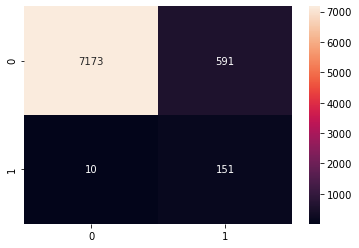

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = brf.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [51]:
# Random Forests calculate feature importance
importances = brf.feature_importances_
importances

array([1.38817971e-01, 1.64751971e-01, 4.42149372e-02, 1.73167490e-02,
       6.51934205e-02, 1.89169555e-02, 3.25508145e-02, 2.71932094e-02,
       3.55943207e-05, 2.05306814e-04, 4.75016594e-03, 1.64402093e-02,
       5.08090327e-03, 3.02427438e-02, 9.10710778e-03, 1.07471641e-02,
       1.11690759e-02, 3.29870815e-03, 2.32354873e-03, 3.38621680e-05,
       1.25315482e-06, 7.32050387e-05, 1.79725554e-04, 6.23062083e-04,
       1.39904417e-05, 3.16445064e-05, 6.99123152e-05, 6.28159819e-04,
       2.42758383e-03, 3.76204673e-04, 2.12367272e-03, 8.29882034e-04,
       9.71911297e-04, 7.78104267e-04, 1.88174981e-04, 2.45147774e-04,
       5.32761650e-05, 1.35112540e-03, 1.11476719e-03, 6.40424840e-03,
       5.91500637e-03, 3.83182293e-03, 6.40038568e-05, 7.22936245e-04,
       4.37107958e-03, 7.53730450e-04, 2.04827328e-04, 2.81363335e-04,
       7.99731426e-04, 4.31015888e-05, 2.37553882e-03, 2.47125639e-03,
       1.54340237e-03, 9.55455725e-05, 4.94407608e-05, 1.23449889e-04,
      

In [52]:
# evaluate feature importance from X parameters
features_df = pd.DataFrame(zip(x_data.columns, brf.feature_importances_))
# sort by feature importance 
features_df = features_df.sort_values(by=[1], ascending=False)
# features_df



In [54]:
# drop all variables less than 0.02 feature importance
x_filtered_df = features_df[features_df[1]>=0.01]
x_filtered_df

,0,1
1,negative,0.164752
0,positive,0.138818
4,totaltags,0.065193
2,maxprice,0.044215
108,tagmultiplayer,0.042081
141,tagsingleplayer,0.034380
6,tagaction,0.032551
13,tagindie,0.030243
7,tagadventure,0.027193
62,tagopenworld,0.020094
